In [2]:
%autosave 300
# -*- coding: utf-8 -*-

Autosaving every 300 seconds


In [3]:
import sys, os
import pandas as pd
import numpy as np
from datetime import timedelta, datetime, time
from timer import date_to_date, time_to_delta
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import random
from Cleanser import get_data
from functools import reduce
matplotlib.style.use('ggplot')
%matplotlib inline

matplotlib 한글 폰트 설정

In [4]:
# print(plt.style.available)
print(matplotlib.matplotlib_fname())

font_location = "C:Windows/Fonts/NanumBarunGothic.ttf"
# font_location = "/Users/RyuQae/Library/Fonts/NanumBarunGothic.otf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

print(matplotlib.rcParams["font.family"])

/Users/RyuQae/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


FileNotFoundError: [Errno 2] No such file or directory: 'C:Windows/Fonts/NanumBarunGothic.ttf'

In [5]:
timer_start = datetime.now()

In [6]:
raw_df = pd.read_csv('output/tidy_data_with_demoinfo.csv',index_col=0)

/Users/RyuQae/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


불러온 데이터프레임의 시간, 방송사, 시청시간 column 수정 및 요일 column 추가

In [7]:
raw_df[raw_df.기간 == 'T1'].groupby(['일자', 'ID']).프로그램명.apply(set)

일자        ID       
20150817  1401639aa    {KBS뉴스12, OBS뉴스&이슈, GETITBEAUTY, 뉴스12, KBS8아침뉴...
          1401639ab    {OBS뉴스&이슈, 파워레인저트레인포스, GETITBEAUTY, 보보경심2, KBS...
          1401643aa    {위기탈출넘버원, SBS월화드라마(미세스캅), 달라졌어요, JTBC뉴스룸, 광복특별...
          1401646aa    {생방송투데이, SBS8뉴스, 스포츠하이라이트, 일일연속극(가족을지켜라), SBS월...
          1401646ab    {생방송투데이, SBS8뉴스, 스포츠하이라이트, 일일연속극(가족을지켜라), SBS월...
          1401694aa    {엄마의탄생, 머니네버슬립스, 스콜피온, SBS생활경제, 너를기억해, 가족을지켜라,...
          1401694ab    {정글의법칙히든킹덤, 2015메이저리그<생>, 남현호의뉴스포커스1부, MBC12정오...
          1401699aa    {뉴스타워2부, 본슈프리머시-2부, NCIS, 일일연속극(위대한조강지처), TV주치...
          1401700aa     {창사특별기획(화정), 월화드라마(별난며느리), 안녕하세요, 생활의달인, NEWS11}
          1401700ab                                 {KBS뉴스광장1부, 모닝와이드2부}
          1401700ac    {도둑들-1부, 도둑들-2부, JTBC뉴스현장, 해리포터와불의잔-1부, 금토미니시리...
          1401710aa    {최고다호기심딱지, 곰디와친구들, 아침연속극(어머님은내며느리), 2015PGA챔피언...
          1401714aa    {내몸사용설명서<재>, 해외걸작드라마(삼총사2<재>), 배트맨비긴즈-2부, MBC5...
          1401714ab    {창사특별기획(

In [8]:
time_columns = ['시청시작시간', '시청종료시간', '프로그램편성시작시간', '프로그램편성종료시간']
raw_df.loc[:, time_columns] = raw_df.loc[:, time_columns].apply(pd.to_datetime)

raw_df['시청시간'] = raw_df.loc[:,['시청종료시간', '프로그램편성종료시간']].min(axis=1) \
                    - raw_df.loc[:,['시청시작시간', '프로그램편성시작시간']].max(axis=1) \
                    + timedelta(seconds = 1)
        
raw_df.방송사 = raw_df.방송사.str.strip()
raw_df.일자 = raw_df.일자.astype('str')
weekday_name = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
raw_df['요일'] = raw_df.일자.apply(date_to_date).apply(datetime.weekday).apply(lambda d: weekday_name[d])

최종 버전의 raw_df를 tidy_df에 복사

In [9]:
tidy_df = raw_df.copy()

In [8]:
start = '17:00'
end = '23:00'

In [9]:
print("전체 방송사 수 : {0}".format(len(set(tidy_df.방송사.values))))
print("전체 시청자 수 : {0}".format(len(set(tidy_df.ID.values))))
tidy_df.groupby('기간').ID.apply(set).apply(lambda x: len(x)).reset_index(name = "패널 수")

전체 방송사 수 : 107
전체 시청자 수 : 5703


,기간,패널 수
0,T1,3935
1,T2,4060
2,T3,3991
3,T4,3907


In [1]:
ids = tidy_df.groupby('기간').ID.apply(set).reset_index('ID')
len(list(reduce(set.intersection, ids.ID[1:])))

NameError: name 'tidy_df' is not defined

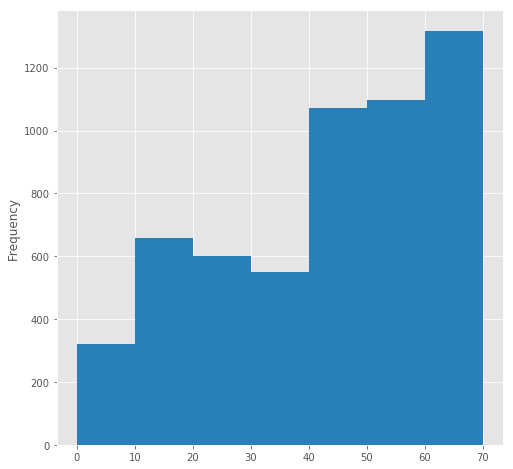

In [12]:
tidy_df[tidy_df.기간 != 'T2'].groupby('ID').연령.apply(set).apply(list)\
.apply(lambda x: x[0]).plot(kind = 'hist', color = "#2980B9", figsize = (8,8), bins=np.arange(0,80,10))

In [12]:
duration_by_cat = tidy_df.groupby('대분류').프로그램시청시간.apply(list).reset_index(name = "시청시간")

In [13]:
duration_by_cat

,대분류,시청시간
0,교육,"[60, 60, 20, 64, 60, 64, 449, 731, 60, 60, 20,..."
1,기타,"[1260, 480, 1518, 1518, 720, 60, 600, 480, 162..."
2,드라마&영화,"[780, 60, 97, 180, 120, 720, 300, 300, 180, 18..."
3,보도,"[660, 60, 234, 197, 660, 120, 60, 120, 120, 18..."
4,스포츠,"[60, 60, 290, 3461, 120, 60, 60, 120, 120, 120..."
5,어린이(유아),"[120, 960, 300, 180, 120, 60, 165, 945, 963, 6..."
6,오락,"[780, 180, 120, 60, 60, 120, 120, 120, 840, 42..."
7,정보,"[780, 883, 180, 180, 60, 120, 120, 178, 180, 1..."


725.693336998


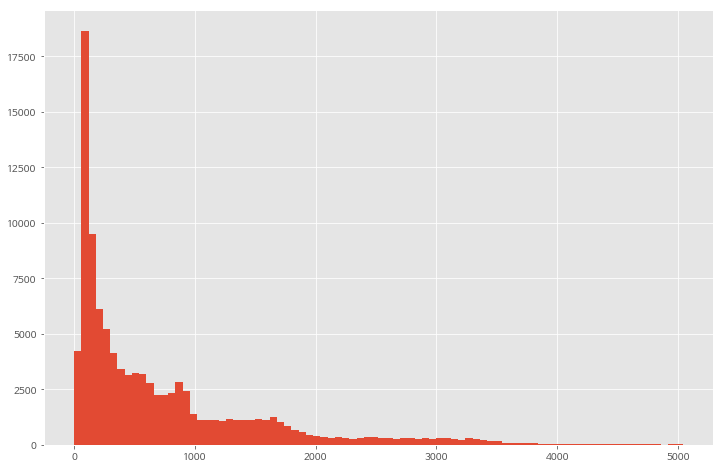

In [20]:
kat = duration_by_cat.시청시간[5]
binwidth = 60
plt.figure(figsize=(12,8))
plt.hist(kat, bins = np.arange(0, 5000 + binwidth, binwidth))

print(np.mean(kat))

In [21]:
tidy_df.방송사.value_counts().reset_index().head(12)

,index,방송사
0,KBS1,337100
1,MBC,298567
2,SBS,291599
3,KBS2,262552
4,MBN,140259
5,JTBC,119369
6,채널A,118593
7,TV조선,109880
8,tvN,98434
9,EBS,83381


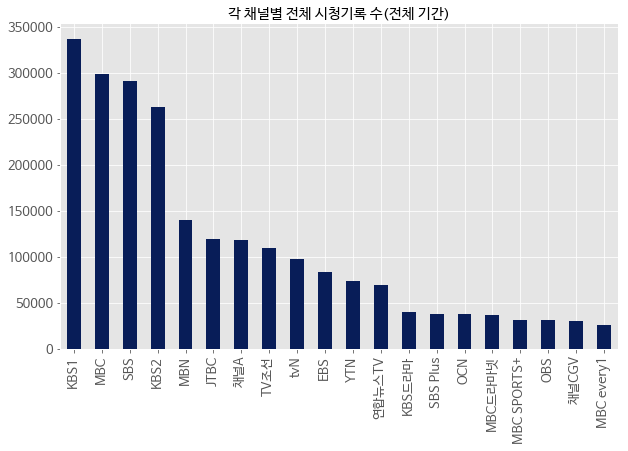

In [22]:
tidy_df.방송사.value_counts().head(20).\
plot(kind = 'bar', figsize = (10, 6), fontsize = 13, title = "각 채널별 전체 시청기록 수(전체 기간)", colormap = "YlGnBu_r");

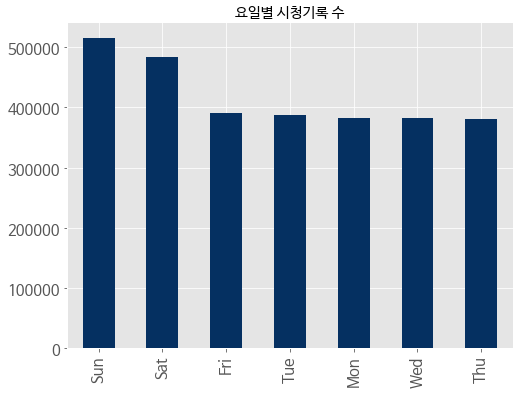

In [23]:
tidy_df.요일.value_counts().plot(kind = "bar", figsize = (8,6), fontsize = 15, title = "요일별 시청기록 수", colormap = "RdBu_r");

In [24]:
ratio = tidy_df.방송사.value_counts().head(12).sum() / tidy_df.shape[0]
print('%.2f' % (round(ratio, 5) * 100), '%')

68.51 %


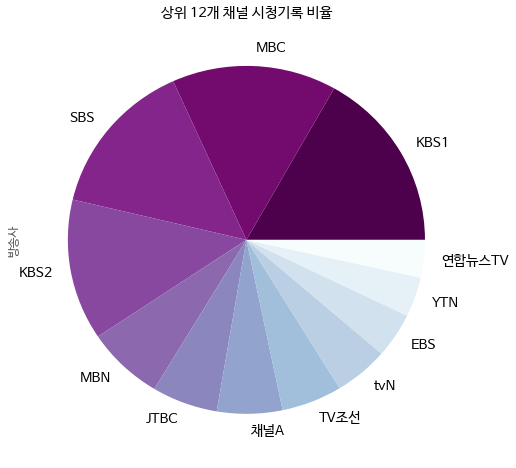

In [25]:
tidy_df.방송사.value_counts().head(12).plot(kind = "pie",\
                                         figsize = (8,8),\
                                         colormap = "BuPu_r",\
                                         fontsize = 14,\
                                         title = "상위 12개 채널 시청기록 비율");

In [26]:
target_channel = list(raw_df.방송사.value_counts().head(12).index)
target_date = tidy_df.일자.unique()
target_weekday =  tidy_df[~tidy_df.요일.isin(['Sat','Sun'])].일자.unique()

각 채널별 분당 시청자 수를 count하는 함수

In [27]:
def visitors_count(date, target_channel=['KBS1', 'MBC', 'SBS', 'KBS2', 'MBN', 'JTBC']):
    prime_start = '{0} {1}'.format(date, start)
    prime_end = '{0} {1}'.format(date, end)
    prime_time = pd.date_range(start = prime_start, end = prime_end, freq ='T')
    daily = pd.DataFrame(index = prime_time)
    # tidy_df는 외부에서 가져온 것이므로 수정 필요
    grouped = tidy_df.groupby(['일자','방송사'])
    for channel in target_channel:
        enter_count = grouped.get_group((date, channel)).시청시작시간.value_counts()
        exit_count = grouped.get_group((date, channel)).시청종료시간.value_counts()
    
        count = pd.concat([enter_count, exit_count], axis=1, keys=["enter", "exit"])
        count.fillna(0, inplace=True)
        count["net_viewer"] = count["enter"] - count["exit"]
        
        daily[channel] = count["net_viewer"].resample("1min").sum().fillna(0).cumsum()
    
    return pd.DataFrame(daily)

target_date에 대한 각 채널별 분당 시청자 수

In [28]:
concat = pd.DataFrame()
for date in target_date:
    temp = visitors_count(date, target_channel)
    concat = concat.append(temp)

In [29]:
concat

,KBS1,MBC,SBS,KBS2,MBN,JTBC,채널A,TV조선,tvN,EBS,YTN,연합뉴스TV
2015-08-17 17:00:00,154.0,32.0,42.0,5.0,31.0,44.0,28.0,30.0,28.0,67.0,11.0,9.0
2015-08-17 17:01:00,150.0,37.0,41.0,1.0,32.0,42.0,31.0,30.0,30.0,61.0,14.0,9.0
2015-08-17 17:02:00,152.0,33.0,43.0,4.0,33.0,39.0,29.0,29.0,30.0,61.0,14.0,7.0
2015-08-17 17:03:00,150.0,33.0,43.0,3.0,33.0,36.0,33.0,27.0,30.0,58.0,15.0,12.0
2015-08-17 17:04:00,148.0,35.0,45.0,9.0,33.0,35.0,32.0,26.0,26.0,57.0,15.0,12.0
2015-08-17 17:05:00,151.0,35.0,44.0,11.0,31.0,33.0,35.0,28.0,26.0,57.0,15.0,10.0
2015-08-17 17:06:00,152.0,32.0,42.0,9.0,31.0,32.0,33.0,28.0,30.0,57.0,16.0,11.0
2015-08-17 17:07:00,153.0,34.0,43.0,11.0,28.0,29.0,33.0,29.0,29.0,39.0,16.0,12.0
2015-08-17 17:08:00,157.0,34.0,44.0,12.0,27.0,28.0,28.0,29.0,30.0,39.0,16.0,11.0
2015-08-17 17:09:00,155.0,35.0,42.0,11.0,23.0,22.0,27.0,36.0,30.0,39.0,17.0,11.0


In [47]:
target_date

array(['20150817', '20150818', '20150819', '20150820', '20150821',
       '20150822', '20150823', '20150824', '20150825', '20150826',
       '20150827', '20150828', '20150829', '20150830', '20160822',
       '20160823', '20160824', '20160825', '20160826', '20160827',
       '20160828', '20160829', '20160830', '20160831', '20160901',
       '20160902', '20160903', '20160904', '20161024', '20161025',
       '20161026', '20161027', '20161028', '20161029', '20161030',
       '20161031', '20161101', '20161102', '20161103', '20161104',
       '20161105', '20161106', '20170109', '20170110', '20170111',
       '20170112', '20170113', '20170114', '20170115', '20170116',
       '20170117', '20170118', '20170119', '20170120', '20170121',
       '20170122'], dtype=object)

In [59]:
# someday = random.choice(target_weekday)
# someday = target_weekday[0]
# someday = target_date[13]
someday = '20170110'
print(someday)
daily_visitors = visitors_count(someday)

20170110


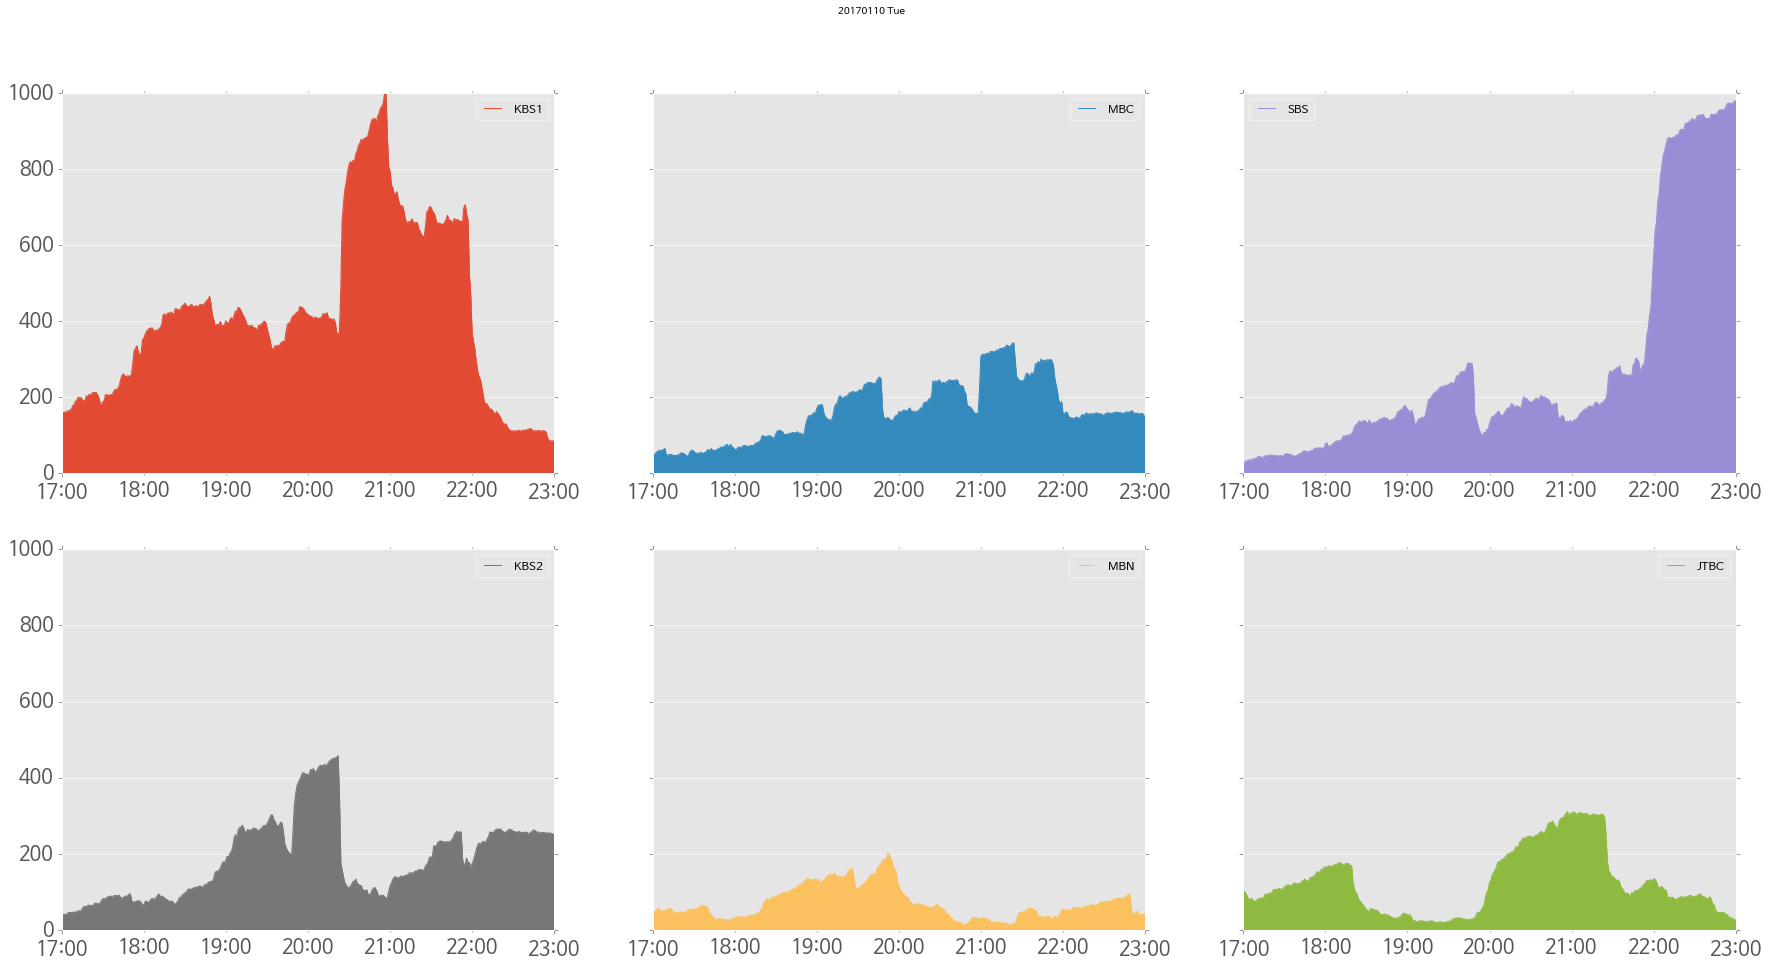

In [61]:
# daily_visitors.plot(subplots=True, figsize=(12, 24));
daily_visitors.plot(subplots=True, layout=(2, 3), figsize=(30, 15), fontsize = 20, legend = True,\
                    kind = 'area', sharex=False, sharey=True, \
                    title='{0} {1}'.format(someday, weekday_name[datetime.weekday(date_to_date(someday))]));

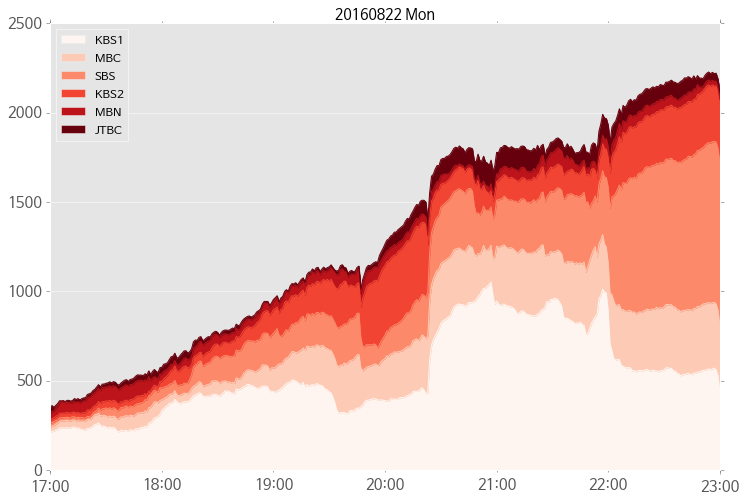

In [363]:
daily_visitors.plot(kind = 'area', figsize = (12, 8), \
                    colormap = 'Reds',fontsize = 15, \
                    title='{0} {1}'.format(someday, weekday_name[datetime.weekday(date_to_date(someday))]));
# df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False);

In [364]:
# concat.head(10)

# 편성표 만들기

In [365]:
schedule = tidy_df.loc[:,['일자', '요일', '방송사', '프로그램명', '프로그램편성시작시간','프로그램편성종료시간', '대분류']].drop_duplicates().copy()

In [366]:
schedule = schedule.sort_values(['일자', '방송사', '프로그램편성시작시간'])

In [367]:
target_schedule = schedule.loc[schedule.방송사.isin(target_channel)].copy()

In [518]:
target_schedule[(target_schedule.일자 == '20150817') & (target_schedule.방송사 == 'SBS')]

,일자,요일,방송사,프로그램명,프로그램편성시작시간,프로그램편성종료시간,대분류
3743,20150817,Mon,SBS,네트워크특선,2015-08-17 02:00:00,2015-08-17 02:13:42,정보
16286,20150817,Mon,SBS,SBS5뉴스,2015-08-17 05:00:00,2015-08-17 05:07:39,보도
2791,20150817,Mon,SBS,SBS특선다큐(어떤동네에살고싶으세요),2015-08-17 05:12:05,2015-08-17 05:56:39,정보
6881,20150817,Mon,SBS,모닝와이드1부,2015-08-17 05:59:38,2015-08-17 06:21:39,정보
529,20150817,Mon,SBS,모닝와이드2부,2015-08-17 06:23:37,2015-08-17 07:28:28,정보
553,20150817,Mon,SBS,모닝와이드3부,2015-08-17 07:30:11,2015-08-17 08:23:32,정보
552,20150817,Mon,SBS,아침연속극(어머님은내며느리),2015-08-17 08:27:37,2015-08-17 09:07:59,드라마&영화
2579,20150817,Mon,SBS,좋은아침,2015-08-17 09:11:01,2015-08-17 09:57:28,오락
1562,20150817,Mon,SBS,SBS뉴스(10:00),2015-08-17 10:00:20,2015-08-17 10:26:58,보도
438,20150817,Mon,SBS,SBS생활경제,2015-08-17 10:29:44,2015-08-17 11:22:43,보도


# SBS8뉴스 기준 전후 인접효과 분석

#### news_viewer : someday에 SBS8뉴스 1분 초과 시청자 list

In [368]:
news_viewer = tidy_df[(tidy_df.일자 == someday) & \
                      (tidy_df.프로그램명.str.contains('SBS8뉴스')) & \
                      (tidy_df.프로그램시청시간 > 60)].ID.unique()
print('{0} SBS8뉴스 시청자 수 : {1}명'.format(someday, len(news_viewer)))

20160822 SBS8뉴스 시청자 수 : 365명


#### news_viewer_df : someday에 news_viewer의 전체 시청기록 dataframe

In [369]:
news_viewer_df = tidy_df[(tidy_df.일자 == someday) & tidy_df.ID.isin(news_viewer)]\
.loc[:,['ID', '방송사', '시청시작시간', '시청종료시간','프로그램시청시간',\
        '프로그램편성시작시간', '프로그램편성종료시간', '프로그램명', '반복']]\
.sort_values(['ID', '시청시작시간', '프로그램편성시작시간']).copy()

#### someday의 SBS 편성 

In [370]:
SBS_schedule = target_schedule[(target_schedule.일자 == someday) & (target_schedule.방송사 == 'SBS')].copy()

In [371]:
# set(SBS_schedule[(SBS_schedule.프로그램명.shift(-1) == 'SBS8뉴스') | (SBS_schedule.프로그램명.shift(1) == 'SBS8뉴스')].프로그램명)
drama = SBS_schedule.loc[(SBS_schedule.프로그램명.shift(-1) == 'SBS8뉴스')].프로그램명.iloc[0]
print('{0} SBS8뉴스 직전 프로그램 : {1}'.format(someday, drama))

20160822 SBS8뉴스 직전 프로그램 : 일일드라마(당신은선물)


In [372]:
SBS_schedule.loc[(SBS_schedule.프로그램명.shift(-1) == 'SBS8뉴스') | (SBS_schedule.프로그램명 == 'SBS8뉴스')]

,일자,요일,방송사,프로그램명,프로그램편성시작시간,프로그램편성종료시간,대분류
909032,20160822,Mon,SBS,일일드라마(당신은선물),2016-08-22 19:11:56,2016-08-22 19:50:24,드라마&영화
909034,20160822,Mon,SBS,SBS8뉴스,2016-08-22 19:53:37,2016-08-22 20:51:45,보도


#### SBS8뉴스 시청자(1분 초과) 중 일일드라마 시청자

In [373]:
both = news_viewer_df[news_viewer_df.프로그램명 == drama].ID.unique()
len(both)

81

#### SBS8뉴스 시청자(1분 초과) 중 일일드라마로부터 이어서 넘어온 시청자

In [374]:
continuous_both = news_viewer_df[(news_viewer_df.프로그램명 == drama)\
               & (news_viewer_df.시청종료시간 > news_viewer_df.프로그램편성종료시간)\
               & (news_viewer_df.반복 == True)]
len(continuous_both.ID.unique())

46

In [375]:
# target_schedule.to_csv('output/program_schedule.csv')

In [376]:
timer_end = datetime.now()
print(timer_end-timer_start)

0:01:46.271840


In [423]:
def weekday_cont_watch(dataf, someday):
    view_threshold = 60
    news_viewer = tidy_df[(tidy_df.일자 == someday) & \
                      (tidy_df.프로그램명.str.contains('SBS8뉴스')) & \
                      (tidy_df.프로그램시청시간 > view_threshold)].ID.unique()
    print('{0} SBS8뉴스 {1}초 초과 시청자 수 : {2}명'.format(someday, view_threshold, len(news_viewer)))
    
    news_viewer_df = tidy_df[(tidy_df.일자 == someday) & tidy_df.ID.isin(news_viewer)]\
                        .loc[:,['ID', '방송사', '시청시작시간', '시청종료시간','프로그램시청시간',\
                                '프로그램편성시작시간', '프로그램편성종료시간', '프로그램명', '반복']]\
                        .sort_values(['ID', '시청시작시간', '프로그램편성시작시간']).copy()
            
    SBS_schedule = target_schedule[(target_schedule.일자 == someday) & (target_schedule.방송사 == 'SBS')].copy()
    drama = SBS_schedule.loc[(SBS_schedule.프로그램명.shift(-1) == 'SBS8뉴스')].프로그램명.iloc[0]
    print('{0} SBS8뉴스 직전 프로그램 : {1}'.format(someday, drama))
    
    both = news_viewer_df[(news_viewer_df.프로그램명 == drama) & (news_viewer_df.프로그램시청시간 > view_threshold)].ID.unique()
    print('{0} SBS8뉴스 시청자 중 {1} {2}초 초과 시청자 수 : {3}명'.format(someday, drama, view_threshold, len(both)))
    
    print('비율 : {0:.2f}%'.format(len(both)/len(news_viewer)*100))

    return (someday, len(news_viewer), drama, len(both), len(both)/len(news_viewer))

In [419]:
weekday_cont_watch(tidy_df, target_weekday[0])

20150817 SBS8뉴스 60초 초과 시청자 수 : 315명
20150817 SBS8뉴스 직전 프로그램 : 일일드라마(돌아온황금복)
20150817 SBS8뉴스 시청자 중 일일드라마(돌아온황금복) 60초 초과 시청자 수: 91명
비율 : 28.89%


(315, '일일드라마(돌아온황금복)', 91)

In [424]:
aggregate = []
for day in target_weekday:
    aggregate.append(weekday_cont_watch(tidy_df, day))
    print('-'*10)

20150817 SBS8뉴스 60초 초과 시청자 수 : 315명
20150817 SBS8뉴스 직전 프로그램 : 일일드라마(돌아온황금복)
20150817 SBS8뉴스 시청자 중 일일드라마(돌아온황금복) 60초 초과 시청자 수 : 91명
비율 : 28.89%
----------
20150818 SBS8뉴스 60초 초과 시청자 수 : 323명
20150818 SBS8뉴스 직전 프로그램 : 일일드라마(돌아온황금복)
20150818 SBS8뉴스 시청자 중 일일드라마(돌아온황금복) 60초 초과 시청자 수 : 92명
비율 : 28.48%
----------
20150819 SBS8뉴스 60초 초과 시청자 수 : 318명
20150819 SBS8뉴스 직전 프로그램 : 일일드라마(돌아온황금복)
20150819 SBS8뉴스 시청자 중 일일드라마(돌아온황금복) 60초 초과 시청자 수 : 93명
비율 : 29.25%
----------
20150820 SBS8뉴스 60초 초과 시청자 수 : 344명
20150820 SBS8뉴스 직전 프로그램 : 일일드라마(돌아온황금복)
20150820 SBS8뉴스 시청자 중 일일드라마(돌아온황금복) 60초 초과 시청자 수 : 106명
비율 : 30.81%
----------
20150821 SBS8뉴스 60초 초과 시청자 수 : 318명
20150821 SBS8뉴스 직전 프로그램 : 일일드라마(돌아온황금복)
20150821 SBS8뉴스 시청자 중 일일드라마(돌아온황금복) 60초 초과 시청자 수 : 86명
비율 : 27.04%
----------
20150824 SBS8뉴스 60초 초과 시청자 수 : 359명
20150824 SBS8뉴스 직전 프로그램 : 일일드라마(돌아온황금복)
20150824 SBS8뉴스 시청자 중 일일드라마(돌아온황금복) 60초 초과 시청자 수 : 119명
비율 : 33.15%
----------
20150825 SBS8뉴스 60초 초과 시청자 수 : 401명
20150825 SBS8뉴스 직전 프로그램 : 일일드라마(돌아온황금복

In [474]:
ts = pd.DataFrame(aggregate, columns = ['일자', '뉴스시청자', '일일드라마', '중복시청자', '비율'])[:10]

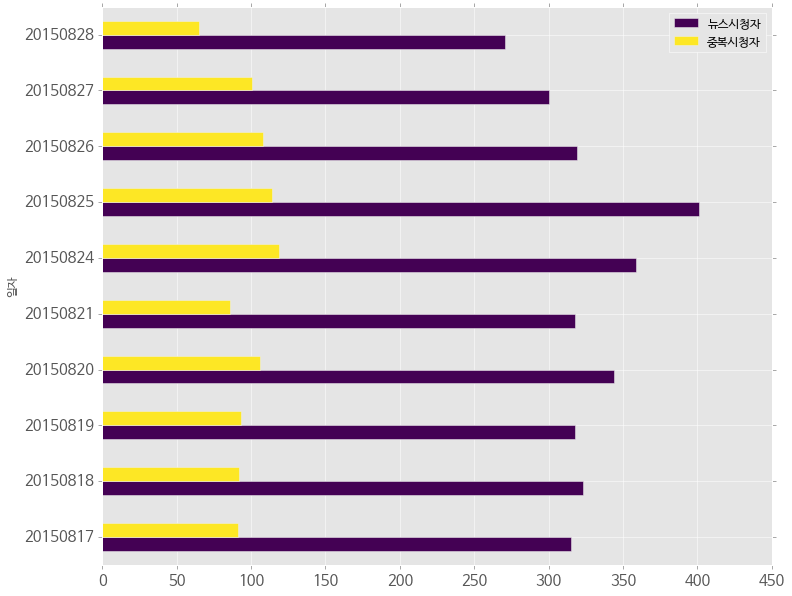

In [526]:
ts.plot(kind = 'barh', x= '일자', y = ['뉴스시청자', '중복시청자'], figsize = (12,10), fontsize = 15, colormap = "viridis")

In [ ]:
# flatten = pd.DataFrame(visitors_count(date, target_channel).stack()).reset_index()
# flatten.columns = ['time', 'channel', 'viewer']